# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")




In [5]:
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:

# Check the number of mice.
unique_mice = combined_data['Mouse ID'].nunique()
unique_mice

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Check for any mouse ID with duplicate time points
duplicates = combined_data.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='count')
duplicate_mice = duplicates[duplicates['count'] > 1]['Mouse ID'].unique()
duplicate_mice

# Get the data for the mouse ID with duplicate time points
if len(duplicate_mice) > 0:
    combined_data[combined_data['Mouse ID'] == duplicate_mice[0]]
else:
    print("No mice with duplicate time points found.")

In [4]:
# Optional: Get all the data for the duplicate mouse ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Create a clean DataFrame by dropping the duplicate mouse
if len(duplicate_mice) > 0:
    clean_data = combined_data[combined_data['Mouse ID'] != duplicate_mice[0]]
else:
    clean_data = combined_data

In [11]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_data['Mouse ID'].nunique()
clean_mice_count
# Display the updated data table
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Generate a summary statistics DataFrame
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Variance', 'var'),
    ('Standard Deviation', 'std'),
    ('SEM', 'sem')
])

# Round the results to 2 decimal places for better readability
summary_stats = summary_stats.round(2)

# Display the summary statistics
summary_stats
# Using the aggregation method, produce the same summary statistics in a single line
# Sort by mean tumor volume in ascending order
summary_stats_sorted = summary_stats.sort_values('Mean')

# Display the sorted summary statistics
summary_stats_sorted

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.22,40.67,23.49,4.85,0.32
Capomulin,40.68,41.56,24.95,4.99,0.33
Propriva,52.32,50.45,43.85,6.62,0.54
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Zoniferol,53.24,51.82,48.53,6.97,0.52
Placebo,54.03,52.29,61.17,7.82,0.58
Stelasyn,54.23,52.43,59.45,7.71,0.57
Naftisol,54.33,52.51,66.17,8.13,0.60


## Bar and Pie Charts

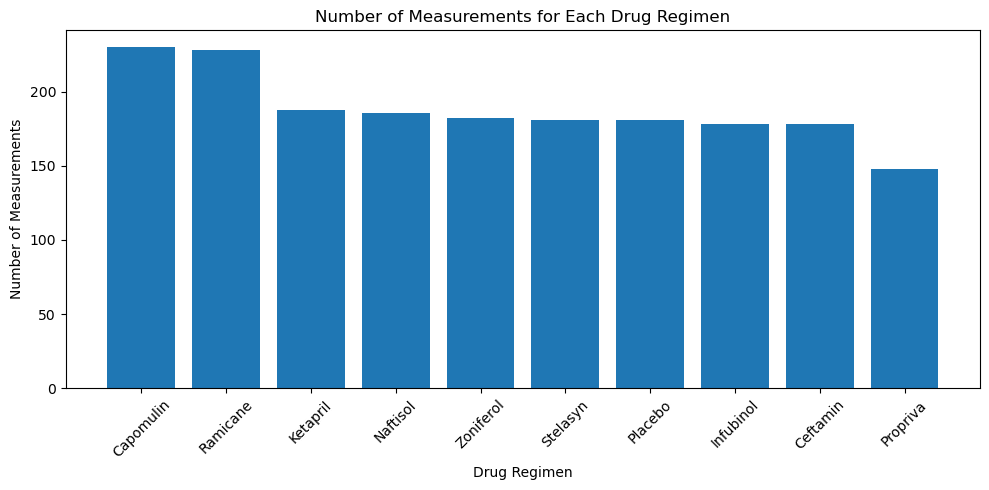

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Calculate the total number of rows for each drug regimen
drug_counts = clean_data['Drug Regimen'].value_counts()



# Bar chart using Matplotlib
plt.figure(figsize=(10, 5))
plt.bar(drug_counts.index, drug_counts.values)
plt.title('Number of Measurements for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

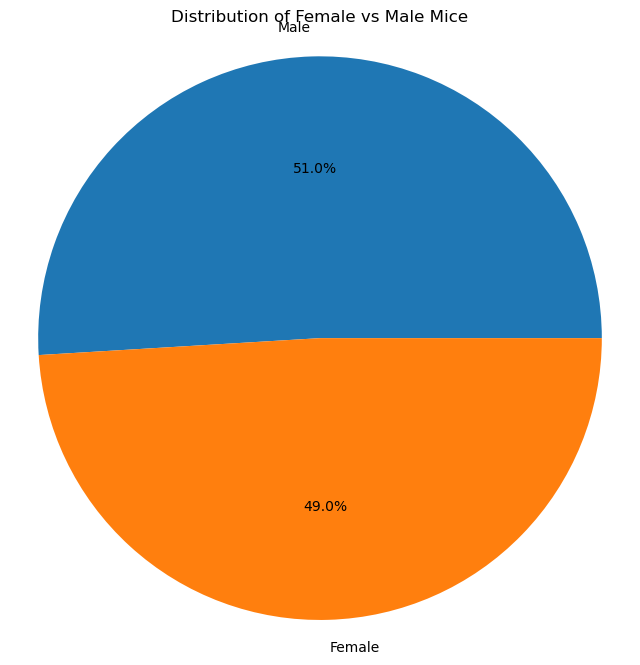

In [18]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
# Calculate the distribution of female versus male mice
sex_distribution = clean_data['Sex'].value_counts()

# Pie chart using Pandas
plt.figure(figsize=(8, 8))
sex_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')
plt.axis('equal')
plt.show()



## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(clean_data, last_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')

# Filter for the specified treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = merged_data[merged_data['Drug Regimen'].isin(treatment_regimens)]

# Display the results
print(final_tumor_volumes[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])

# Calculate summary statistics for each treatment
summary_stats = final_tumor_volumes.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
print("\nSummary Statistics:")
print(summary_stats)


    Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
7       u153     Ceftamin          0           45.000000
8       b447     Ceftamin          0           45.000000
10      x226     Ceftamin          0           45.000000
11      t573     Ceftamin          0           45.000000
20      c326    Infubinol          5           36.321346
..       ...          ...        ...                 ...
234     a644     Ramicane         45           32.978522
240     i177     Ramicane         45           33.562402
243     r944    Capomulin         45           41.581521
244     u364    Capomulin         45           31.023923
245     p438     Ceftamin         45           61.433892

[100 rows x 4 columns]

Summary Statistics:
                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     36.667568  38.125164  32.663378  5.715188  1.143038
Ceftamin      57.753977  59.851956  69.982735  8.365568  1.673114
Infubin

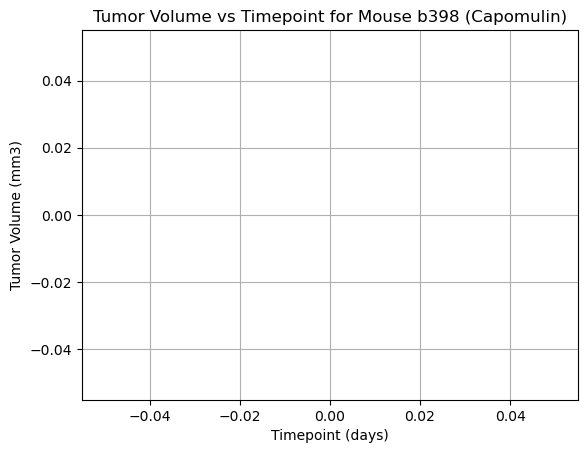

In [20]:
# Select a single mouse treated with Capomulin
mouse_data = clean_data[clean_data['Mouse ID'] == 'b398']

# Create a simple line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title('Tumor Volume vs Timepoint for Mouse b398 (Capomulin)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()



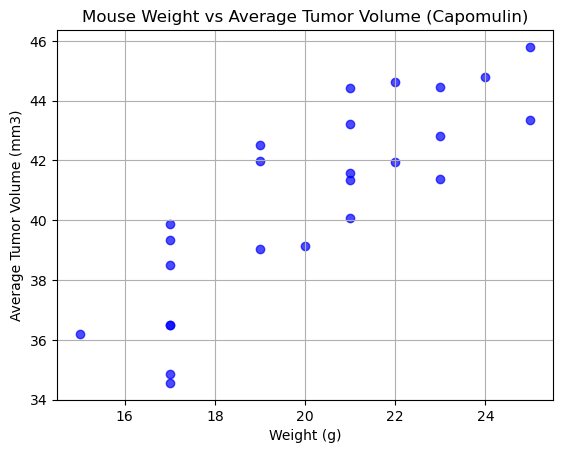

In [21]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Filter data for Capomulin treatment
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume and mouse weight
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Create a simple scatter plot
plt.scatter(mouse_weight, avg_tumor_vol, color='b', alpha=0.7)
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()


## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter data for Capomulin treatment
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume and first recorded weight for each mouse
capomulin_summary = capomulin_data.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'first'
}).reset_index()

# Rename columns for clarity
capomulin_summary = capomulin_summary.rename(columns={
    'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)',
    'Weight (g)': 'Weight (g)'
})

# Display the summary data
capomulin_summary.head()



,Mouse ID,Average Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22
1,b742,40.083699,21
2,f966,36.505973,17
3,g288,41.990097,19
4,g316,44.613344,22


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is: 0.8419
Slope: 0.9544
Intercept: 21.5522
R-squared value: 0.7089


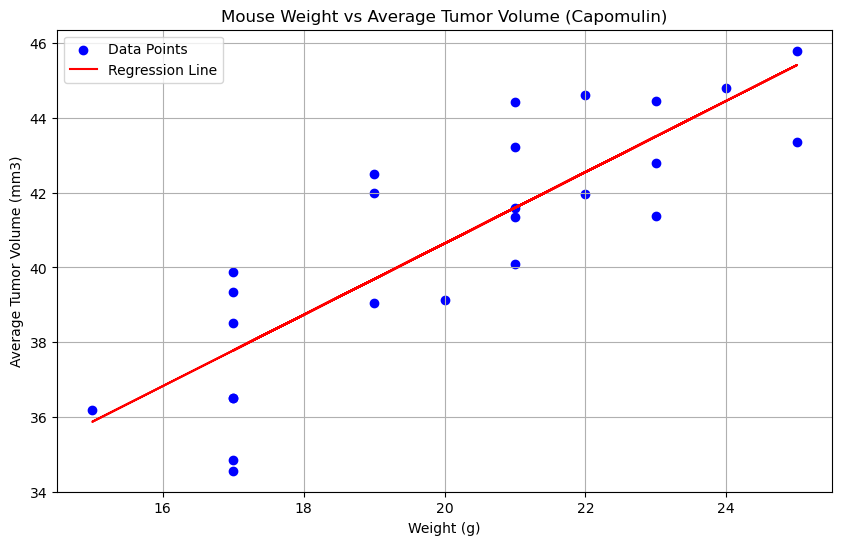

In [26]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = capomulin_summary['Weight (g)'].corr(capomulin_summary['Average Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is: {correlation:.4f}")
from scipy import stats

# Perform linear regression between mouse weight and average tumor volume
slope, intercept, r_value, p_value, std_err = stats.linregress(
    capomulin_summary['Weight (g)'], capomulin_summary['Average Tumor Volume (mm3)']
)

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared value: {r_value**2:.4f}")

# Create scatter plot of mouse weight vs average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_summary['Weight (g)'], capomulin_summary['Average Tumor Volume (mm3)'], color='blue', label='Data Points')

# Plot the regression line
x_values = capomulin_summary['Weight (g)']
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Customize plot
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

